As the project has just started, your team doesn't have any data that can be used to create this application. Therefore, your job will be to:

Scrape data from destinations
Get weather data from each destination
Get hotels' info about each destination
Store all the information above in a data lake
Extract, transform and load cleaned data from your datalake to a data warehouse

In [1]:
# import libraries
import requests
import json
import pandas as pd
from statistics import mean

Marketing team wants to focus first on the best cities to travel to in France. According One Week In.com here are the top-35 cities to visit in France:

In [2]:
# liste des villes étudiées

top_35_cities = ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]

In [3]:
# scrapper la geolocalisation des villes
# Use https://nominatim.org/ 

#  https://nominatim.openstreetmap.org/search?<params>
endpoint = "https://nominatim.openstreetmap.org"

response =  requests.get(endpoint)
print("Response code:",response,"\n \n")

Response code: <Response [200]> 
 



In [7]:
response =  requests.get("https://nominatim.openstreetmap.org/search?q=Ariege&format=json")
print("Response code:",response,"\n \n")
print("Response data:\n")
response.content

Response code: <Response [200]> 
 

Response data:



b'[{"place_id":297389050,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"relation","osm_id":7439,"boundingbox":["42.5732416","43.3162514","0.8267506","2.1758135"],"lat":"42.9455368","lon":"1.4065544156065486","display_name":"Ari\xc3\xa8ge, Occitanie, France m\xc3\xa9tropolitaine, France","class":"boundary","type":"administrative","importance":0.6009114788084189,"icon":"https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png"},{"place_id":299422341,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"relation","osm_id":13625918,"boundingbox":["51.1624195","51.199616","-56.0111241","-55.9723346"],"lat":"51.18111155","lon":"-55.98447423947262","display_name":"Ariege (Belvy) Bay, Main Brook, Newfoundland, Newfoundland and Labrador, Canada","class":"natural","type":"bay","importance":0.29999999999999993},{"place_id":135201531,"licence":"Data \xc2\xa9 OpenStreet

In [8]:
response.json()

[{'place_id': 297389050,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 7439,
  'boundingbox': ['42.5732416', '43.3162514', '0.8267506', '2.1758135'],
  'lat': '42.9455368',
  'lon': '1.4065544156065486',
  'display_name': 'Ariège, Occitanie, France métropolitaine, France',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 0.6009114788084189,
  'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'},
 {'place_id': 299422341,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 13625918,
  'boundingbox': ['51.1624195', '51.199616', '-56.0111241', '-55.9723346'],
  'lat': '51.18111155',
  'lon': '-55.98447423947262',
  'display_name': 'Ariege (Belvy) Bay, Main Brook, Newfoundland, Newfoundland and Labrador, Canada',
  'class': 'natural',
  'type': 'bay',
  'importance': 0.299999999999

In [9]:
# intialisation dataframe vide
df_cities = pd.DataFrame(columns = ['Id', 'City' , 'Latitude', 'Longitude'])

In [10]:
# parcours la liste des 35 cités
for counter, city in enumerate(top_35_cities):
    response =  requests.get(f"https://nominatim.openstreetmap.org/search?q={city}&format=json")
    # Complète le dataframe
    df_cities.loc[counter] = [response.json()[0]['place_id'],
                              city,
                              response.json()[0]['lat'],
                              response.json()[0]['lon']]

In [11]:
df_cities

,Id,City,Latitude,Longitude
0,156094680,Mont Saint Michel,48.6359541,-1.511459954959514
1,297756747,St Malo,48.649518,-2.0260409
2,297981358,Bayeux,49.2764624,-0.7024738
3,298137491,Le Havre,49.4938975,0.1079732
4,297518815,Rouen,49.4404591,1.0939658
5,297417241,Paris,48.8588897,2.3200410217200766
6,297534793,Amiens,49.8941708,2.2956951
7,297472400,Lille,50.6365654,3.0635282
8,297508568,Strasbourg,48.584614,7.7507127
9,120791766,Chateau du Haut Koenigsbourg,48.249489800000006,7.34429620253195


In [13]:
len(df_cities)

35

In [14]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         35 non-null     int64 
 1   City       35 non-null     object
 2   Latitude   35 non-null     object
 3   Longitude  35 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [15]:
# scrap the weather
# Use https://openweathermap.org/appid 

# some information about the weather for the 35 cities
# https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

# import libraries

from credentials import APIKEY 

# API key
APPID = APIKEY

EXCLUDE = 'current,minutely,hourly'

In [16]:
#  https://nominatim.openstreetmap.org/search?<params>
endpoint = "https://api.openweathermap.org/data/2.5/onecall?"

# example
params = {'exclude' : EXCLUDE ,
          'appid' : APPID ,
          'lat' : '48.6359541' ,
          'lon' : -1.511459954959514,
          'units' : 'metric'}

response =  requests.get(endpoint, params = params)
print("Response code:",response,"\n \n")
response.json()

Response code: <Response [200]> 
 



{'lat': 48.636,
 'lon': -1.5115,
 'timezone': 'Europe/Paris',
 'timezone_offset': 7200,
 'daily': [{'dt': 1665313200,
   'sunrise': 1665296200,
   'sunset': 1665336585,
   'moonrise': 1665336960,
   'moonset': 1665293340,
   'moon_phase': 0.5,
   'temp': {'day': 18.09,
    'min': 7.95,
    'max': 19.49,
    'night': 13.91,
    'eve': 17.83,
    'morn': 7.97},
   'feels_like': {'day': 17.21, 'night': 12.92, 'eve': 16.97, 'morn': 5.42},
   'pressure': 1015,
   'humidity': 48,
   'dew_point': 6.92,
   'wind_speed': 6.89,
   'wind_deg': 139,
   'wind_gust': 12.08,
   'weather': [{'id': 801,
     'main': 'Clouds',
     'description': 'few clouds',
     'icon': '02d'}],
   'clouds': 20,
   'pop': 0,
   'uvi': 2.71},
  {'dt': 1665399600,
   'sunrise': 1665382688,
   'sunset': 1665422864,
   'moonrise': 1665424380,
   'moonset': 1665384300,
   'moon_phase': 0.52,
   'temp': {'day': 17.46,
    'min': 9.92,
    'max': 17.7,
    'night': 9.92,
    'eve': 14.17,
    'morn': 14.75},
   'feels_like'

In [17]:
import datetime

# date of extraction
date = response.json()['daily'][0]['dt']
readable = datetime.datetime.fromtimestamp(date).isoformat()
readable

'2022-10-09T13:00:00'

In [18]:
# params
params = {'exclude' : EXCLUDE ,
          'appid' : APPID ,
          'units' : 'metric'}

# initialization of an empty dataframe
df_weather = pd.DataFrame(columns = ['Id', 'City','lat','lon','temp', 'pop', 'clouds', 'weather_main'])

# browse the list of 35 cities by latitude and longitude
for counter, (id, city, lat, lon) in enumerate(zip(df_cities['Id'],
                                                   df_cities['City'],
                                                   df_cities['Latitude'],
                                                   df_cities['Longitude'])):
    # latitude and longitude of each city
    localpoint = endpoint + f"lat={lat}&lon={lon}"
    response =  requests.get(localpoint, params = params)
    
    # Retrieves weather information for the next 7 days
    temp = []
    pop = []
    clouds = []
    weather_main =[]
    for i in range(1, len(response.json()['daily'])):
        temp.append((response.json()['daily'][i]['temp']['day']))
        pop.append((response.json()['daily'][i]['pop']))
        clouds.append((response.json()['daily'][i]['clouds']))
        weather_main.append((response.json()['daily'][i]['weather'][0]['main']))
        
        
    
    # Complete the dataframe
    df_weather.loc[counter] = [id, city, float(lat), float(lon), mean(temp), mean(pop), mean(clouds), weather_main]

In [19]:
df_weather

,Id,City,lat,lon,temp,pop,clouds,weather_main
0,156094680,Mont Saint Michel,48.635954,-1.511460,16.735714,0.467143,83.142857,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"
1,297756747,St Malo,48.649518,-2.026041,16.392857,0.475714,84.000000,"[Rain, Clouds, Clouds, Rain, Clouds, Rain, Rain]"
2,297981358,Bayeux,49.276462,-0.702474,15.268571,0.544286,84.714286,"[Rain, Clouds, Clouds, Rain, Clouds, Rain, Rain]"
3,298137491,Le Havre,49.493898,0.107973,14.871429,0.602857,88.857143,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"
4,297518815,Rouen,49.440459,1.093966,15.597143,0.595714,92.714286,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"
5,297417241,Paris,48.858890,2.320041,17.527143,0.408571,87.714286,"[Clouds, Clouds, Clouds, Rain, Rain, Rain, Clo..."
6,297534793,Amiens,49.894171,2.295695,15.315714,0.540000,94.000000,"[Clouds, Clouds, Clouds, Rain, Rain, Rain, Rain]"
7,297472400,Lille,50.636565,3.063528,14.641429,0.548571,96.857143,"[Clouds, Clouds, Clouds, Rain, Rain, Rain, Rain]"
8,297508568,Strasbourg,48.584614,7.750713,17.552857,0.641429,76.857143,"[Rain, Clouds, Clouds, Clouds, Rain, Rain, Rain]"
9,120791766,Chateau du Haut Koenigsbourg,48.249490,7.344296,15.498571,0.677143,76.142857,"[Rain, Clouds, Clouds, Clouds, Rain, Rain, Rain]"


In [25]:
for (id, city) in (zip(df_weather['Id'], df_weather['City'])):
    url = f'https://www.booking.com/searchresults.fr.html?ss={city}'
    print(id, city)
    print(url)
    

156094680 Mont Saint Michel
https://www.booking.com/searchresults.fr.html?ss=Mont Saint Michel
297756747 St Malo
https://www.booking.com/searchresults.fr.html?ss=St Malo
297981358 Bayeux
https://www.booking.com/searchresults.fr.html?ss=Bayeux
298137491 Le Havre
https://www.booking.com/searchresults.fr.html?ss=Le Havre
297518815 Rouen
https://www.booking.com/searchresults.fr.html?ss=Rouen
297417241 Paris
https://www.booking.com/searchresults.fr.html?ss=Paris
297534793 Amiens
https://www.booking.com/searchresults.fr.html?ss=Amiens
297472400 Lille
https://www.booking.com/searchresults.fr.html?ss=Lille
297508568 Strasbourg
https://www.booking.com/searchresults.fr.html?ss=Strasbourg
120791766 Chateau du Haut Koenigsbourg
https://www.booking.com/searchresults.fr.html?ss=Chateau du Haut Koenigsbourg
297504747 Colmar
https://www.booking.com/searchresults.fr.html?ss=Colmar
297869324 Eguisheim
https://www.booking.com/searchresults.fr.html?ss=Eguisheim
297668227 Besancon
https://www.booking.com/s

In [22]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      35 non-null     int64  
 1   City    35 non-null     object 
 2   lat     35 non-null     float64
 3   lon     35 non-null     float64
 4   temp    35 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ KB


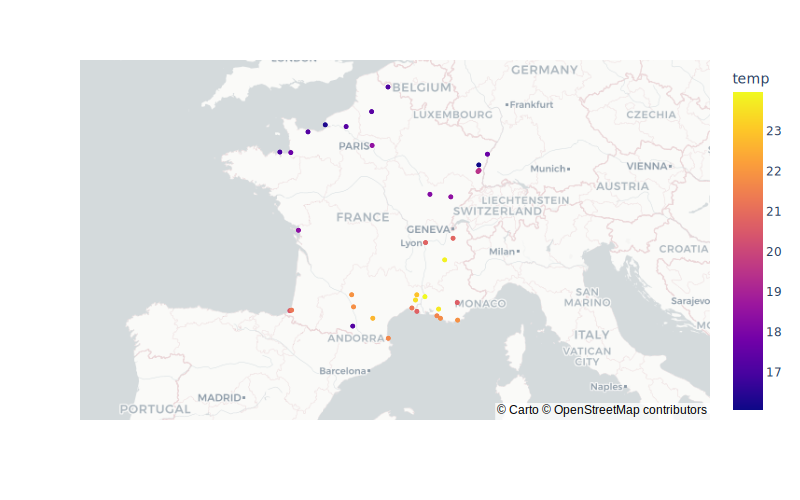

In [41]:
import plotly.express as px
import plotly.io as pio

# pio.renderers.default = "svg"

fig = px.scatter_mapbox(df_weather,
                        lat ="lat",
                        lon = "lon",
                        color = "temp",
                        hover_name = "City",
                        zoom = 3.9,
                        mapbox_style = "carto-positron",
                        width = 800)
fig.show()

In [20]:
df_weather.to_csv("cities_weather.csv")

## Scrape Booking.com

Since BookingHoldings doesn't have aggregated databases, it will be much faster to scrape data directly from booking.com

You can scrap as many information asyou want, but we suggest that you get at least:

hotel name,
Url to its booking.com page,
Its coordinates: latitude and longitude
Score given by the website users
Text description of the hotel

In [29]:
!python bookingHotel.py

2022-10-09 17:07:07 [scrapy.utils.log] INFO: Scrapy 2.6.3 started (bot: scrapybot)
2022-10-09 17:07:07 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 2.0.1, Twisted 22.8.0, Python 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)], pyOpenSSL 22.1.0 (OpenSSL 3.0.5 5 Jul 2022), cryptography 38.0.1, Platform Windows-10-10.0.19043-SP0
2022-10-09 17:07:07 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 20, 'USER_AGENT': 'Chrome/97.0'}
2022-10-09 17:07:07 [scrapy.extensions.telnet] INFO: Telnet Password: f54b6bb7d79ccc0f
2022-10-09 17:07:07 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2022-10-09 17:07:07 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy

In [30]:
df_booking = pd.read_json("src/booking_hotel.json", encoding='utf-8')

In [48]:
df_booking.to_csv("booking_weather2.csv")

In [31]:
df_booking.head()

,url,city_id,name_hotel,score,coordinates,text_description
0,https://www.booking.com/hotel/fr/hotel-celine....,297518815,Hôtel Céline - Hôtel de la Gare,"8,0","1.06252587352748,49.4310680988023,1.1178954788...",[L'Hôtel Céline - Hôtel de la Gare se trouve d...
1,https://www.booking.com/hotel/fr/the-first.fr....,297518815,"Le First, centre ville terrasse et parking","9,1","1.05554739606558,49.4280597834269,1.1109136039...",[Vous pouvez bénéficier d'une réduction Genius...
2,https://www.booking.com/hotel/fr/your-place-in...,298137491,Your Place in LH,"7,0","0.106590074275424,49.4807985834269,0.162015925...",[Vous pouvez bénéficier d'une réduction Genius...
3,https://www.booking.com/hotel/fr/studio-cocoon...,297756747,Studio cocooning,"9,4","-2.03052323228447,48.6374142834269,-1.97603056...",[Vous pouvez bénéficier d'une réduction Genius...
4,https://www.booking.com/hotel/fr/express-by-ho...,297534793,"Holiday Inn Express Amiens, an IHG Hotel","7,9","2.27981597007699,49.8737107813327,2.3356917518...","[Rénové en avril 2015, le Holiday Inn Express ..."


In [32]:
df_booking['city_id'].unique()

array([297518815, 298137491, 297756747, 297534793, 297981358, 297508568,
       156094680, 120791766, 297869324, 298516920, 297639071, 297668227,
       297681191, 297478568, 297504747, 297472400, 297417241,  76036307,
       297749145, 297763730, 297906924, 298018344, 297655586, 297997049,
       298011281, 297932490, 297389050, 298222566, 298221742, 298516909,
       297466626, 297768703, 298072685, 298271847, 297653650], dtype=int64)

In [33]:
df_booking_weather = df_booking.merge(df_weather, left_on='city_id', right_on='Id', how='outer')
df_booking_weather.head()

,url,city_id,name_hotel,score,coordinates,text_description,Id,City,lat,lon,temp,pop,clouds,weather_main
0,https://www.booking.com/hotel/fr/hotel-celine....,297518815,Hôtel Céline - Hôtel de la Gare,"8,0","1.06252587352748,49.4310680988023,1.1178954788...",[L'Hôtel Céline - Hôtel de la Gare se trouve d...,297518815,Rouen,49.440459,1.093966,15.597143,0.595714,92.714286,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"
1,https://www.booking.com/hotel/fr/the-first.fr....,297518815,"Le First, centre ville terrasse et parking","9,1","1.05554739606558,49.4280597834269,1.1109136039...",[Vous pouvez bénéficier d'une réduction Genius...,297518815,Rouen,49.440459,1.093966,15.597143,0.595714,92.714286,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"
2,https://www.booking.com/hotel/fr/industriel-ch...,297518815,"L'INDUSTRIEL CHIC, 2 PIECES AVEC VU IMPRENABLE...","9,0","1.04465806489105,49.4328606384189,1.1000296949...",[Vous pouvez bénéficier d'une réduction Genius...,297518815,Rouen,49.440459,1.093966,15.597143,0.595714,92.714286,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"
3,https://www.booking.com/hotel/fr/de-la-cathedr...,297518815,Hôtel De La Cathédrale,"7,8","1.06925386466515,49.4221513972113,1.1246134015...",[Arborant une façade à colombages datant du XV...,297518815,Rouen,49.440459,1.093966,15.597143,0.595714,92.714286,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"
4,https://www.booking.com/hotel/fr/le-palm-duple...,297518815,Le Palm ✧ Duplex centre historique Rouen,"9,3","1.05837701832101,49.4260720834269,1.1137409816...",[Vous pouvez bénéficier d'une réduction Genius...,297518815,Rouen,49.440459,1.093966,15.597143,0.595714,92.714286,"[Rain, Clouds, Clouds, Rain, Rain, Rain, Rain]"


In [34]:
df_booking_weather.describe(include="all")

,url,city_id,name_hotel,score,coordinates,text_description,Id,City,lat,lon,temp,pop,clouds,weather_main
count,875,8.750000e+02,874,867,875,875,8.750000e+02,875,875.000000,875.000000,875.000000,875.000000,875.000000,875
unique,875,NaN,873,40,873,875,NaN,35,NaN,NaN,NaN,NaN,NaN,21
top,https://www.booking.com/hotel/fr/hotel-celine....,NaN,Le Valmer,"8,0","5.68637707337778,45.1749075834269,5.7374569266...",[L'Hôtel Céline - Hôtel de la Gare se trouve d...,NaN,Rouen,NaN,NaN,NaN,NaN,NaN,"[Rain, Clouds, Clouds, Clouds, Rain, Rain, Rain]"
freq,1,NaN,2,50,2,1,NaN,25,NaN,NaN,NaN,NaN,NaN,100
mean,NaN,2.823779e+08,NaN,NaN,NaN,NaN,2.823779e+08,NaN,45.840986,3.395928,19.771347,0.346531,67.608163,NaN
std,NaN,5.137416e+07,NaN,NaN,NaN,NaN,5.137416e+07,NaN,2.554274,2.913222,2.933438,0.188661,15.718124,NaN
min,NaN,7.603631e+07,NaN,NaN,NaN,NaN,7.603631e+07,NaN,42.525050,-2.026041,14.641429,0.122857,43.714286,NaN
25%,NaN,2.975047e+08,NaN,NaN,NaN,NaN,2.975047e+08,NaN,43.494514,1.354999,17.527143,0.171429,53.000000,NaN
50%,NaN,2.977491e+08,NaN,NaN,NaN,NaN,2.977491e+08,NaN,45.187560,4.360069,20.000000,0.288571,58.857143,NaN
75%,NaN,2.980113e+08,NaN,NaN,NaN,NaN,2.980113e+08,NaN,48.584614,5.735782,22.808571,0.544286,83.142857,NaN


In [37]:
len(df_booking_weather['City'].unique())

35